# Domain Composition

## Modules

NOTE: This notebook uses `my_mpi.py` for domain decomposition and assimilation. By changing the `p` parameter the process can be divided ito required number of cores. 

In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.metrics import mean_squared_error

### Defininig paths to observation and background data

In [2]:
#Observation data path
obs_path ="Data/Ferguson_fire_obs.npy" 
# obs_path ="Data/Ferguson_fire_test.npy" 

#Background data path
background_path = "Data/Ferguson_fire_background.npy"
# background_path = "Data/Ferguson_fire_train.npy"

### Defining output file and number of processors

In [3]:
# Number of processes
processors = 2
# Assimilated data numpy save file name
save_name = 'recon2.npy'

# Observation data

In [4]:
#Load the observation data 

obs_data = np.load(obs_path)
obs_size = obs_data.shape[0]
obs_width = obs_data.shape[1]
obs_height = obs_data.shape[2]
obs_channels = 1
print("Data type: ", obs_data.dtype)
print("Shape: ", obs_data.shape)
print("Unique pixel values: ", np.unique(obs_data))
print("Batch size: ", obs_size)
print("Width: ", obs_width)
print("Height ", obs_height)

Data type:  float64
Shape:  (5, 256, 256)
Unique pixel values:  [0. 1.]
Batch size:  5
Width:  256
Height  256


### Original observation images

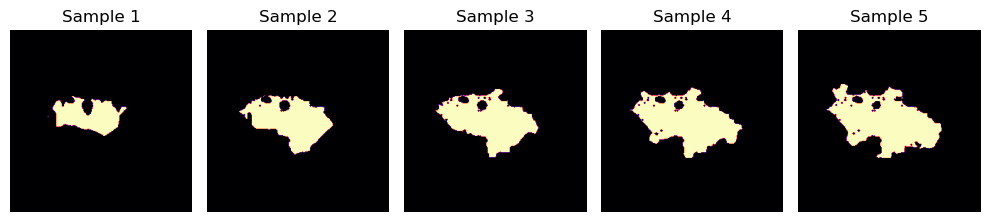

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(obs_data[i], cmap='magma') 
    axes[i].set_title(f"Sample {i+1}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
#Flattening the images for MSE calculation
observation_flattened = obs_data.flatten()

# Background data

In [7]:
background_data = np.load(background_path)[:5000, :, :]
background_size = background_data.shape[0]
background_width = background_data.shape[1]
background_height = background_data.shape[2]
background_channels = 1
print("Data type: ", background_data.dtype)
print("Shape: ", background_data.shape)
print("Unique pixel values: ", np.unique(background_data))
print("Batch size: ", background_size)
print("Width: ", background_width)
print("Height ", background_height)

Data type:  int16
Shape:  (5, 256, 256)
Unique pixel values:  [0 1]
Batch size:  5
Width:  256
Height  256


### Original background images 

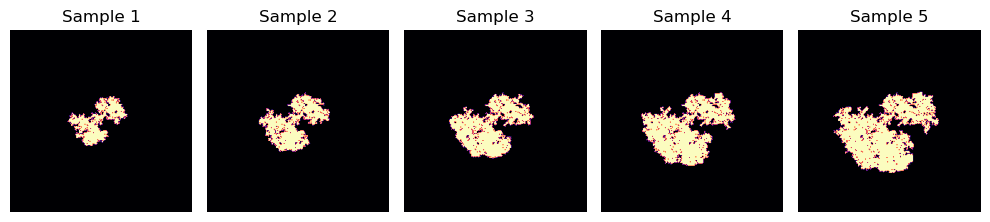

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(background_data[i], cmap='magma') 
    axes[i].set_title(f"Sample {i+1}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

## Domain decomposition and assimilation

### Define processes and name of files

## P=2

In [16]:
processors = 2
save_name = 'recon2.npy'

### Command line command to run MPI with defined parameters

In [17]:
start = time.time()
os.system(f'mpiexec -n {processors} python my_mpi.py {processors} {obs_path} {background_path} {save_name}')
print("Time taken: ", time.time() - start)

Time taken:  2.640994071960449


### Load the data(DA) saved by the above command

In [18]:
recon_data = np.load(save_name)

### Visualise the assimilated data

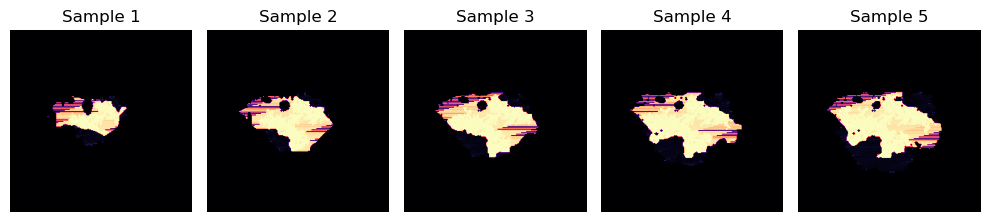

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(recon_data[i], cmap='magma') 
    axes[i].set_title(f"Sample {i+1}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

### MSE calculation

In [20]:
recon_data = recon_data.flatten() # Flattening the image
mse2 = mean_squared_error(observation_flattened, recon_data)
print("MSE for p=2 is: ", mse2)

MSE for p=2 is:  0.009083741591887155


## P=4

In [21]:
processors = 4
save_name = 'recon4.npy'

### Command line command to run MPI with defined parameters


In [22]:
start = time.time()
os.system(f'mpiexec -n {processors} python my_mpi.py {processors} {obs_path} {background_path} {save_name}')
print("Time taken: ", time.time() - start)

Time taken:  2.316795587539673


### Load the data(DA) saved by the above command

In [23]:
recon_data = np.load(save_name)

### Visualise the assimilated data


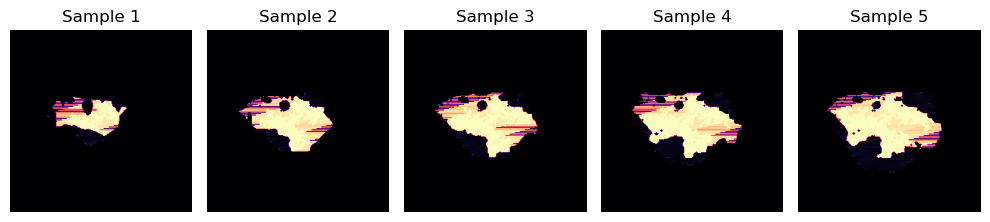

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(recon_data[i], cmap='magma') 
    axes[i].set_title(f"Sample {i+1}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

### MSE calculation

In [25]:
recon_data = recon_data.flatten() # Flattening the image
mse4 = mean_squared_error(observation_flattened, recon_data)
print("MSE for p=2 is: ", mse4)

MSE for p=2 is:  0.009088360787208764


## P=8

In [32]:
processors = 8
save_name = 'recon8.npy'

### Command line command to run MPI with defined parameters


In [33]:
start = time.time()
os.system(f'mpiexec -n {processors} python my_mpi.py {processors} {obs_path} {background_path} {save_name}')
print("Time taken: ", time.time() - start)

Time taken:  2.692869186401367


### Load the data(DA) saved by the above command

In [100]:
recon_data = np.load(save_name)

### Visualise the assimilated data


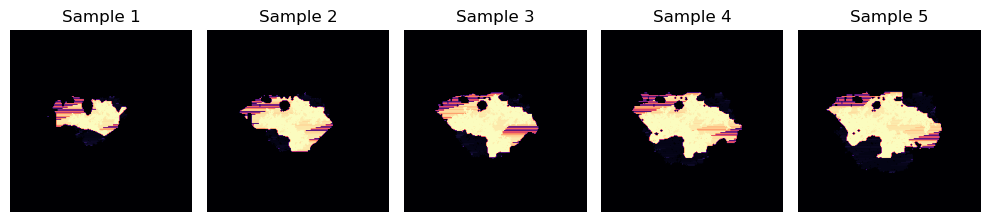

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(recon_data[i], cmap='magma') 
    axes[i].set_title(f"Sample {i+1}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

### MSE calculation

In [83]:
recon_data = recon_data.flatten() # Flattening the image
mse8 = mean_squared_error(observation_flattened, recon_data)
print("MSE for p=2 is: ", mse8)

MSE for p=2 is:  0.009274456102716273


## Usage

Using the model is simple. Define the number of processes and give observation file path, give background file path and the assimilated save file name.

In [97]:
# In this case we are doing for p=8

processors = 8
save_name = 'recon8.npy'

In [98]:
# Using os module to execute commandline command with our defined parameters

os.system(f'mpiexec -n {processors} python my_mpi.py {processors} {obs_path} {background_path} {save_name}')
#Loads the data saved by the above process
recon_data = np.load(save_name)

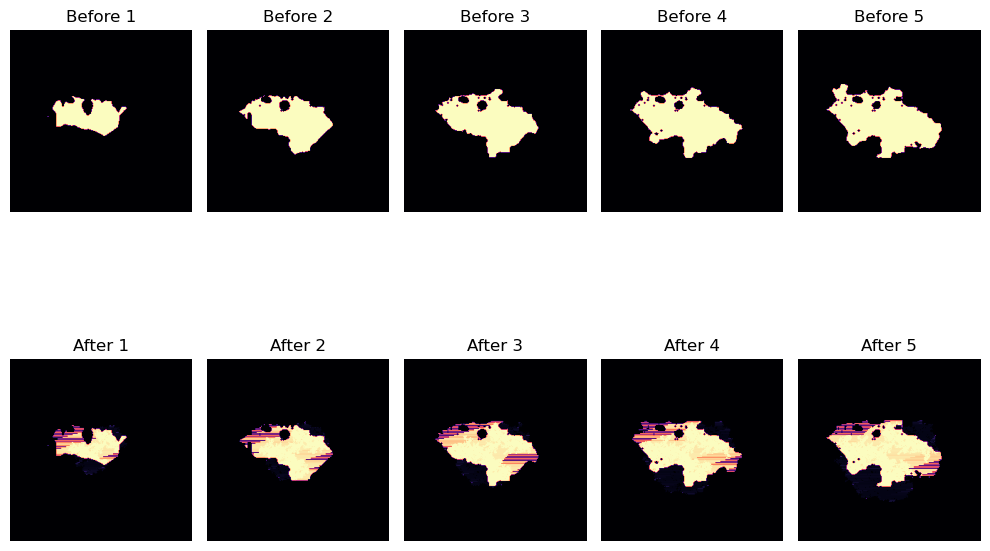

In [103]:
#Visualise the assimilated data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    axes[i].imshow(obs_data[i], cmap='magma') 
    axes[i].set_title(f"Before {i+1}") 
    axes[i].set_axis_off()
    
    axes[i+5].imshow(recon_data[i], cmap='magma') 
    axes[i+5].set_title(f"After {i+1}") 
    axes[i+5].set_axis_off()
plt.tight_layout()
plt.show()

In [104]:
# MSE calculation 
recon_data = recon_data.flatten() # Flattening the image
mse8 = mean_squared_error(observation_flattened, recon_data)
print("MSE for p=2 is: ", mse8)

MSE for p=2 is:  0.009274456102716273


# Results

### p=2

Decomposed space MSE:
 - MSE of rank 1 is:  0.020365614278351856
 - MSE of rank 0 is:  0.005192370990360545

Decomposed space Execution time:
 - Execution time of rank 1 is:  0.8021144866943359 seconds
 - Execution time of rank 0 is:  0.8061134815216064 seconds
 - Average Execution time: 0.85316170978546143 seconds
 
Reconstructed space MSE: 0.009088360787208764

Average Execution time: 0.85316170978546143 seconds

### p=4 

Decomposed space MSE:
- MSE of rank 1 is:  0.004743331380229966
- MSE of rank 2 is:  0.01749696733265324
- MSE of rank 3 is:  0.023972241030770784
- MSE of rank 0 is:  0.0054590709356972375

Decomposed space Execution time:
 - Execution time of rank 1 is:  0.44958066940307617 seconds
 - Execution time of rank 2 is:  0.4615817070007324 seconds
 - Execution time of rank 3 is:  0.4370710849761963 seconds
 - Execution time of rank 0 is:  0.45858073234558105 seconds
 - Average Execution time: 0.44958066940307617 seconds
 
Reconstructed space MSE: 0.009088360787208764

Execution time: 0.5381615161895752 seconds

### p=8

Decomposed space MSE:
- MSE of rank 1 is:  0.0007568359375
- MSE of rank 2 is:  0.005498222303323425
- MSE of rank 3 is:  0.0027146219992392174
- MSE of rank 4 is:  0.005086404433989377
- MSE of rank 5 is:  0.027570057056677665
- MSE of rank 6 is:  0.0015719710682343892
- MSE of rank 0 is:  0.009679996249917616
- MSE of rank 7 is:  0.047083556446188286

Decomposed space Execution time:
- Execution time of rank 1 is:  0.5136241912841797 seconds
- Execution time of rank 2 is:  0.518622875213623 seconds
- Execution time of rank 3 is:  0.5166261196136475 seconds
- Execution time of rank 4 is:  0.5176234245300293 seconds
- Execution time of rank 5 is:  0.5206234455108643 seconds
- Execution time of rank 6 is:  0.5186231136322021 seconds
- Execution time of rank 0 is:  0.5246212482452393 seconds
- Execution time of rank 7 is:  0.5226240158081055 seconds
 
Reconstructed space MSE: 0.009274456102716273

Execution time: 0.6647052764892578 seconds